In [1]:
import sys, os
os.chdir("..")

cwd: C:\Users\Andy\Documents\Personal_Projects\tennis-mlops\tennis-pred


In [2]:
!"{sys.executable}" -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
import joblib
import json
import matplotlib.pyplot as plt

In [4]:
# load model + encoders + metrics
model = joblib.load("models/model_lgb.pkl")

with open("models/metrics.json") as f:
    metrics = json.load(f)
print("Validation metrics:", metrics)

with open("models/schema.json") as f:
    schema = json.load(f)
print("Schema:", schema)

Validation metrics: {'logloss': 0.6248037906741695, 'auc': 0.7067379033604826, 'accuracy': 0.6548262548262548, 'n_train': 11655, 'n_val': 1295}
Schema: {'numeric': ['rank_diff', 'age_diff', 'ht_diff', 'best_of', 'hand_match'], 'categorical': ['surface', 'tourney_level']}


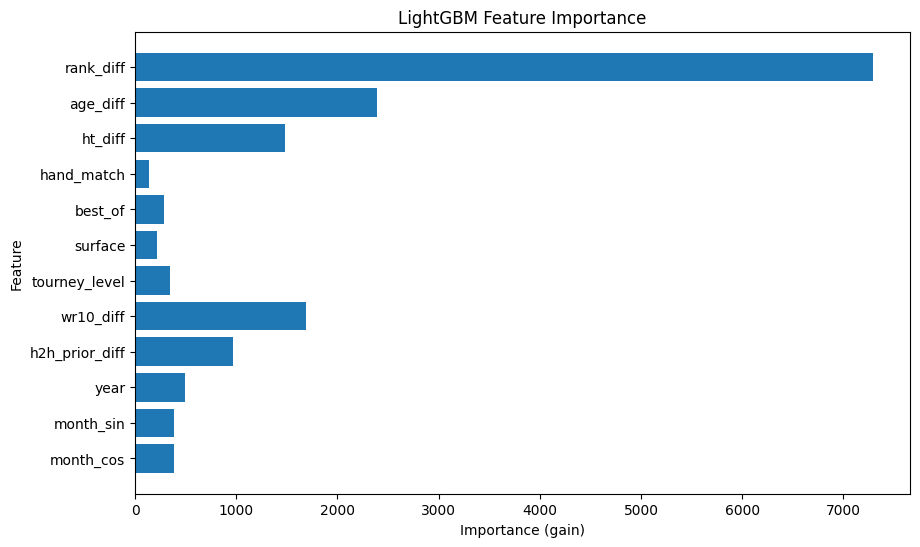

In [5]:
# Get importance
importance = model.feature_importance(importance_type="gain")
features = model.feature_name()

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.xlabel("Importance (gain)")
plt.ylabel("Feature")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()